In [1]:
# Load packages
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = 'C:/Users/angel/Documents/Economics/Research/Banking Project/data/intermediate/call_reports'

# Set path to be the directory:
os.chdir(path)

In [3]:
#df = pd.concat([pd.read_csv(f, usecols=['Reporting Period End Date', 'IDRSSD', 'var_name', 'value']) for f in os.listdir() if f.endswith('.csv')])

# list of var_names:
#list = ['RIADA517', 'RIADA518', 'RIAD4508', 'RIAD0093', 'RIADHK03', 'RIADHK04', 'RCON6636']

# create a subset of df with only the var_names in the list:
#df2 = df[df['var_name'].isin(list)]
#df2.to_csv('C:/Users/angel/Documents/Economics/Research/Banking Project/data/intermediate/call_reports/call_reports.csv', index = False)

In [4]:
# Read file that contains only the variables of interest 
df = pd.read_csv('call_reports.csv')

In [5]:
# Rename 'Reporting Period End Date' to 'Date':
df.rename(columns = {'Reporting Period End Date':'Date'}, inplace = True)

# Convert 'Date' to datetime:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# Define important codes for different time periods
pre_2017 = ['RIADA517', 'RIADA518', 'RIAD4508', 'RIAD0093']
post_2017 = ['RIADHK03', 'RIADHK04', 'RIAD4508', 'RIAD0093']  

In [7]:
# Filter and sum for dates before 2017
df_before_2017 = df[(df['var_name'].isin(pre_2017)) & (df['Date'] < '2017-01-01')]
df_before_2017_grouped = df_before_2017.groupby(['IDRSSD', 'Date'])['value'].sum().reset_index()
df_before_2017_grouped.rename(columns={'value': 'Dep_Expenditure'}, inplace=True)

In [8]:
# Filter and sum for dates from 2017 onwards
df_from_2017 = df[(df['var_name'].isin(post_2017)) & (df['Date'] >= '2017-01-01')]
df_from_2017_grouped = df_from_2017.groupby(['IDRSSD', 'Date'])['value'].sum().reset_index()
df_from_2017_grouped.rename(columns={'value': 'Dep_Expenditure'}, inplace=True)

In [9]:
# Put the two dataframes together so they account for the whole period:
df2 = pd.concat([df_before_2017_grouped, df_from_2017_grouped])

In [10]:
# Merge df and df2 on 'IDRSSD' and 'Date':
df = df.merge(df2, on = ['IDRSSD', 'Date'])

In [11]:
df['Total_Deposits'] = df[df['var_name'] == 'RCON6636']['value']

In [12]:
df['Deposit_Rate'] = df['Dep_Expenditure'] / df['Total_Deposits']

In [13]:
# Keep only one row per IDRSSD and Date:
df = df.drop_duplicates(subset = ['IDRSSD', 'Date'])

In [14]:
# Drop if either Total_Deposits or Dep_Expenditure is missing (or zero):
df = df[(df['Total_Deposits'] > 0) & (df['Dep_Expenditure'] > 0)]

In [15]:
# Create a filter to remove the outliers in the Deposit_Rate variable:
filter = df['Deposit_Rate'] < df['Deposit_Rate'].quantile(0.99)

# Apply the filter:
df_plot = df[filter]

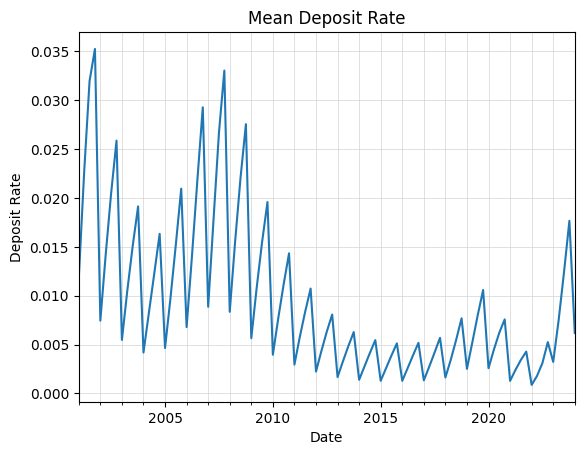

In [16]:
# Compute the mean Deposit_Rate per Date and plot it:
df_plot.groupby('Date')['Deposit_Rate'].mean().plot()

# Make this plot prettier:
plt.title('Mean Deposit Rate')
plt.ylabel('Deposit Rate')
plt.xlabel('Date')
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='lightgrey')
plt.show()


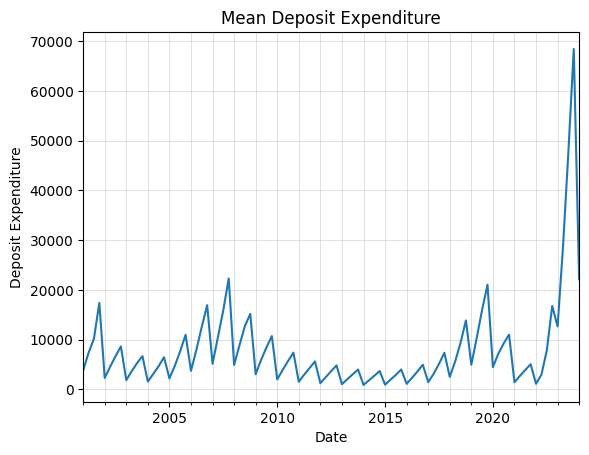

In [17]:
# Compute the mean Deposit_Rate per Date and plot it:
df_plot.groupby('Date')['Dep_Expenditure'].mean().plot()

# Make this plot prettier:
plt.title('Mean Deposit Expenditure')
plt.ylabel('Deposit Expenditure')
plt.xlabel('Date')
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='lightgrey')
plt.show()


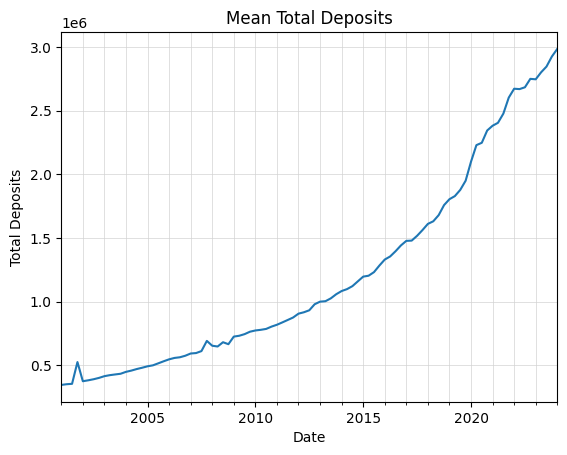

In [18]:
# Do the same plot for 'Total_Deposits':
df_plot.groupby('Date')['Total_Deposits'].mean().plot()

# Make this plot prettier:
plt.title('Mean Total Deposits')
plt.ylabel('Total Deposits')
plt.xlabel('Date')
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='lightgrey')
plt.show()

Text(0.5, 0, 'Deposit Rate')

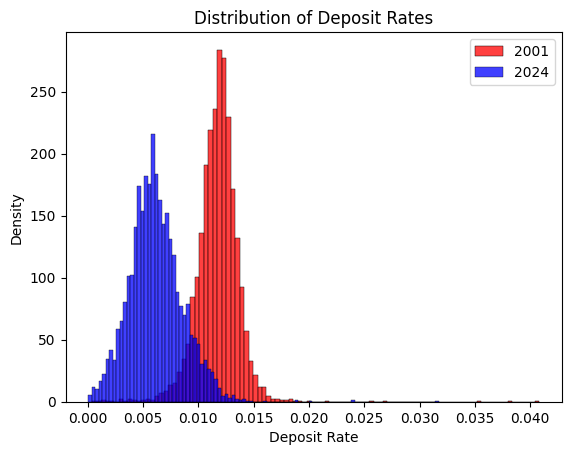

In [19]:
# Plot the distribution of Deposit_Rate for the first 'Date' and the last one:
sns.histplot(df_plot[df_plot['Date'] == df_plot['Date'].min()]['Deposit_Rate'], bins = 100, stat = 'density', color = 'red')
sns.histplot(df_plot[df_plot['Date'] == df_plot['Date'].max()]['Deposit_Rate'], bins = 100, stat = 'density', color = 'blue')
# Put a legend:
plt.legend(['2001', '2024'])
plt.title('Distribution of Deposit Rates')
plt.xlabel('Deposit Rate')

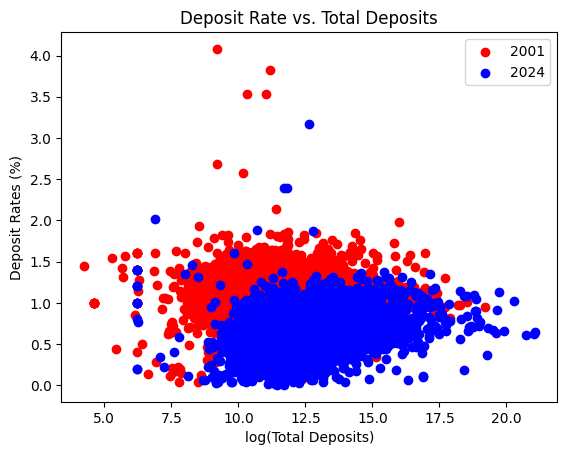

In [23]:
# Make a scatter plot with Deposit_Rate in the y-axis and 
# log(Total_Deposits) in the x-axis, for the first and last 'Date':
plt.scatter(np.log(df_plot[df_plot['Date'] == df_plot['Date'].min()]['Total_Deposits']), 
            df_plot[df_plot['Date'] == df_plot['Date'].min()]['Deposit_Rate']*100, color = 'red')
plt.scatter(np.log(df_plot[df_plot['Date'] == df_plot['Date'].max()]['Total_Deposits']),
            df_plot[df_plot['Date'] == df_plot['Date'].max()]['Deposit_Rate']*100, color = 'blue')
plt.title('Deposit Rate vs. Total Deposits')
plt.xlabel('log(Total Deposits)')
plt.ylabel('Deposit Rates (%)')
plt.legend(['2001', '2024'])
plt.show()

